In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
NYC = pd.read_csv('AB_NYC_2019-Copy1.csv')

In [11]:
NYC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
print(NYC.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [15]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
NYC.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
print("shape of dataset:",NYC.shape)

shape of dataset: (48895, 16)


### Data Integrity

In [22]:
print(NYC.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [24]:
## converting last review from object to datetime format
NYC['last_review'] = pd.to_datetime(NYC['last_review'])

In [26]:
## confiming the change
print(NYC.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [34]:
## checking for negative values in relevant columns
columns = NYC[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']] < 0

#find rows with negative values
negative_values = NYC[columns.any(axis=1)]

#display negative values
print(negative_values)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


### from the result, it shows there are no negative values found in the columns

## Handle missing data

In [38]:
print(NYC.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


####  to maintain data structure and avoid data loss, the method chosen for last review is to fill with a placeholder date

In [41]:
##fill nulls with a place holder date
NYC['last_review'] = NYC['last_review'].fillna('1900-01-01')

In [43]:
## the method chosen for reviews per month is to replace with mean
mean_reviews = NYC['reviews_per_month'].mean()
NYC['reviews_per_month'] = NYC['reviews_per_month'].fillna(mean_reviews)

#### the method chosen for name and host name is to fill with a placeholder value which is "unknown" in other to maintain data integrity

In [48]:
## fill name with a placeholder
NYC['name'] = NYC['name'].fillna('Unknown')

## fill hist name with placeholder
NYC['host_name'] = NYC['host_name'].fillna('Unknown')

In [50]:
print(NYC.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


#### missing values have been handled

## Duplicate Removal

In [55]:
duplicates = NYC.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


#### No duplicates found in the data

## Standardization

In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
## considering the numerical columns
numericals =['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',
            'availability_365']

scaler = StandardScaler()

NYC[numericals] = scaler.fit_transform(NYC[numericals])

In [67]:
## extracting date and time components
NYC['review_year'] = NYC['last_review'].dt.year
NYC['review_month'] = NYC['last_review'].dt.month
NYC['review_day'] = NYC['last_review'].dt.day

## Outlier detection

#### identifying outliers using standard deviation

In [71]:
## using threshold 3
threshold = 3
mean = NYC['price'].mean()
std = NYC['price'].std()
NYC['outlier_flag'] = (NYC['price'] - mean).abs() > threshold * std

outliers = NYC[NYC['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
             id                                               name    host_id  \
496      174966              Luxury 2Bed/2.5Bath Central Park View     836168   
762      273190          6 Bedroom Landmark West Village Townhouse     605463   
946      363673                   Beautiful 3 bedroom in Manhattan     256239   
1105     468613   $ (Phone number hidden by Airbnb) weeks - room f    2325861   
1414     634353                Luxury 1Bed with Central Park Views     836168   
...         ...                                                ...        ...   
48301  36186719           Private Bedroom in the Heart of Chelsea!  268920555   
48304  36189195      Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   
48305  36189257             2BR Near Museum Mile! Upper East Side!  272166348   
48523  36308562  Tasteful & Trendy Brooklyn Brownstone, near Train  217732163   
48535  36311055     Stunning & Stylish Brooklyn Luxury, near Train  245712163   

           host_n

In [77]:
## handling outliers using IQR method
Q1 = NYC['price'].quantile(0.25)
Q3 = NYC['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 + IQR
upper_bound = Q3 + 1.5 + IQR

cleaned_data = NYC[(NYC['price'] >= lower_bound) & (NYC['price'] <= upper_bound)]

Text(0.5, 1.0, 'Box plot after outlier removal')

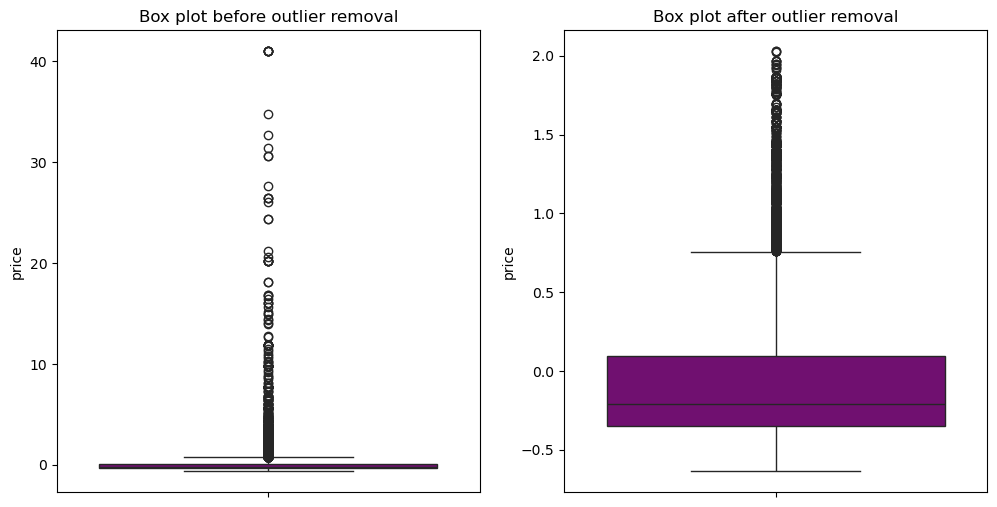

In [79]:
## distribution of data before and after outlier distribution
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=NYC['price'], color ='purple')
plt.title('Box plot before outlier removal')

plt.subplot(1,2,2)
sns.boxplot(y=cleaned_data['price'], color = 'purple')
plt.title('Box plot after outlier removal')

In [81]:
# for number of reviews
threshold = 3
mean = NYC['number_of_reviews'].mean()
std = NYC['number_of_reviews'].std()
NYC['outlier_flag'] = (NYC['number_of_reviews'] - mean).abs() > threshold * std

outliers = NYC[NYC['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
             id                                            name    host_id  \
3          3831                 Cozy Entire Floor of Brownstone       4869   
7          5178                Large Furnished Room Near B'way        8967   
9          5238              Cute & Cozy Lower East Side 1 bdrm       7549   
11         5441                 Central Manhattan/near Broadway       7989   
12         5803  Lovely Room 1, Garden, Best Area, Legal rental       9744   
...         ...                                             ...        ...   
28370  22035333         *Memory foam mattress lovers//Netflix!!  146449899   
28651  22176831   JFK 2 Comfort 5 Mins from JFK Private Bedroom  156684502   
28801  22241573                Private Room B In Prime Location  162427870   
29280  22463977     Amazing Master Bedroom in Historic Brooklyn  164650025   
29628  22750161   JFK 3 Comfort 5 Mins from JFK Private Bedroom  156684502   

         host_name neighbourhood_group        neighbo

In [83]:
Q1 = NYC['number_of_reviews'].quantile(0.25)
Q3 = NYC['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 + IQR
upper_bound = Q3 + 1.5 + IQR

cleaned_data = NYC[(NYC['number_of_reviews'] >= lower_bound) & (NYC['number_of_reviews'] <= upper_bound)]

Text(0.5, 1.0, 'Box plot after outlier removal')

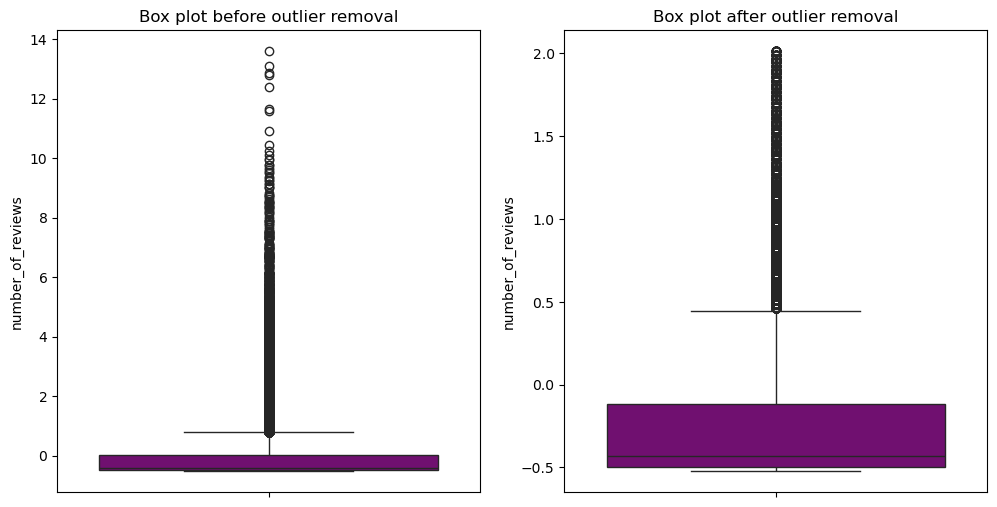

In [85]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=NYC['number_of_reviews'], color ='purple')
plt.title('Box plot before outlier removal')

plt.subplot(1,2,2)
sns.boxplot(y=cleaned_data['number_of_reviews'], color = 'purple')
plt.title('Box plot after outlier removal')

In [87]:
# for minimum nights
threshold = 3
mean = NYC['minimum_nights'].mean()
std = NYC['minimum_nights'].std()
NYC['outlier_flag'] = (NYC['minimum_nights'] - mean).abs() > threshold * std

outliers = NYC[NYC['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
             id                                             name    host_id  \
14         6090                    West Village Nest - Superhost      11975   
61        15396               Sunny & Spacious Chelsea Apartment      60278   
106       25235                Large 2 Bedroom Great for Groups!      87773   
245       61509              Quiet, clean midtown apt w. elevato      23619   
349       94209               LARGE 1BR (CONV 2BR) CROWN HEIGHTS     503800   
...         ...                                              ...        ...   
48043  36056808     Luxury TriBeCa Apartment at an amazing price  271248669   
48145  36108714                Williamsburg Waterfront Apartment     212865   
48205  36138789          Room with Amazing location in Manhattan   31846499   
48312  36199363  Furnished room  for rent in Bronx SINGLE FEMALE  272247972   
48446  36270376   Beautiful home on Staten Island, walk to ferry     444904   

        host_name neighbourhood_group    

In [89]:
Q1 = NYC['minimum_nights'].quantile(0.25)
Q3 = NYC['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 + IQR
upper_bound = Q3 + 1.5 + IQR

cleaned_data = NYC[(NYC['minimum_nights'] >= lower_bound) & (NYC['minimum_nights'] <= upper_bound)]

Text(0.5, 1.0, 'Box plot after outlier removal')

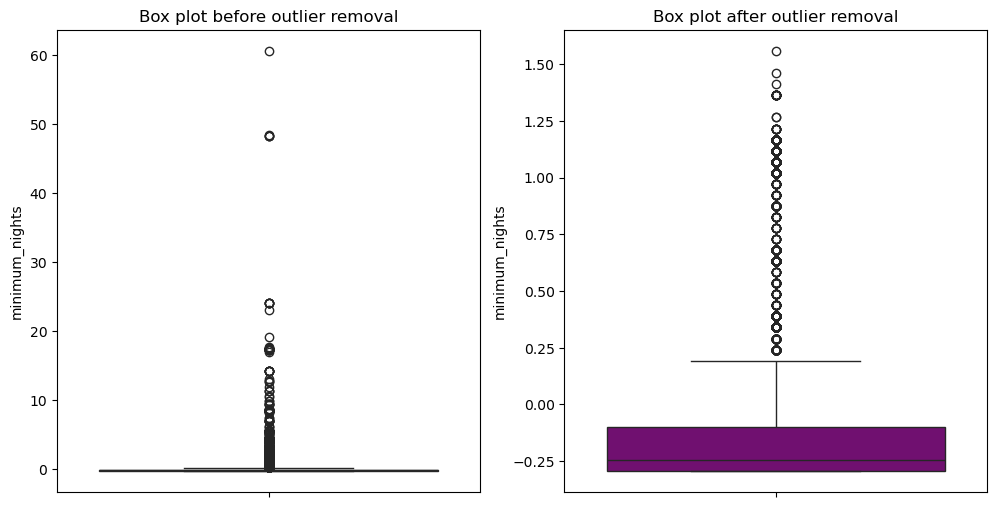

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=NYC['minimum_nights'], color ='purple')
plt.title('Box plot before outlier removal')

plt.subplot(1,2,2)
sns.boxplot(y=cleaned_data['minimum_nights'], color = 'purple')
plt.title('Box plot after outlier removal')

In [93]:
# for reviews per month
threshold = 3
mean = NYC['reviews_per_month'].mean()
std = NYC['reviews_per_month'].std()
NYC['outlier_flag'] = (NYC['reviews_per_month'] - mean).abs() > threshold * std

outliers = NYC[NYC['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
             id                                               name    host_id  \
471      166172                    LG Private Room/Family Friendly     792159   
534      195233  Hospitality on Propsect Pk-12 yrs Hosting Lega...     949221   
553      205043                            Modern Condo in Midtown    1007558   
1614     732700                Centrally located and spacious apt.    3815537   
1627     741154                Beautiful duplex loft with Skylight    1406458   
...         ...                                                ...        ...   
47579  35808578              Sunny, Comfortably Cozy, Private Room  269375490   
47585  35811237     Centrally located spacious 1-bedroom apartment  269401661   
47708  35875858  #3 Hotel-Like LOFT Private Room KING Bed Near JFK  263504959   
47967  36004542             Cosy Bedroom in the Heart of Manhattan   30461045   
48031  36041065        Large bedroom with private bathroom is suit  225118276   

                 

In [95]:
Q1 = NYC['reviews_per_month'].quantile(0.25)
Q3 = NYC['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 + IQR
upper_bound = Q3 + 1.5 + IQR

cleaned_data = NYC[(NYC['reviews_per_month'] >= lower_bound) & (NYC['reviews_per_month'] <= upper_bound)]

Text(0.5, 1.0, 'Box plot after outlier removal')

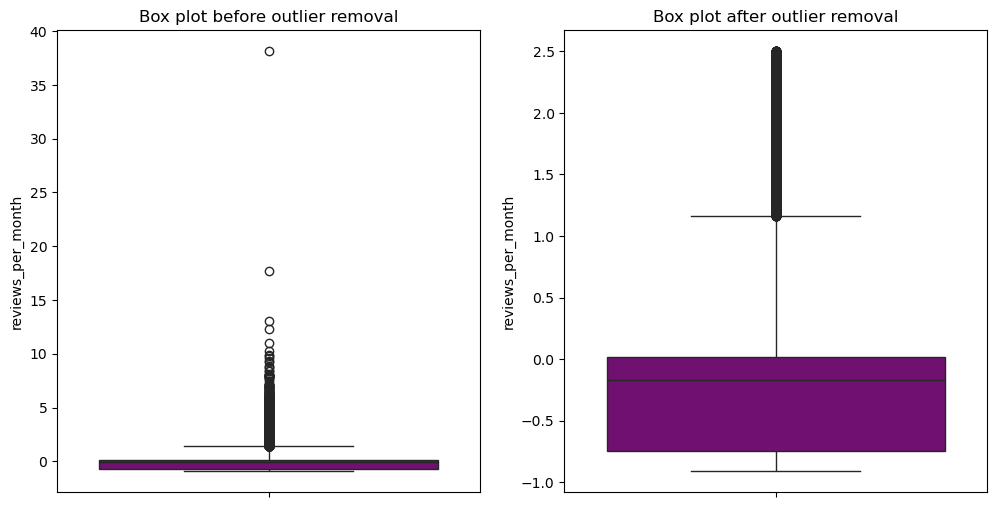

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=NYC['reviews_per_month'], color ='purple')
plt.title('Box plot before outlier removal')

plt.subplot(1,2,2)
sns.boxplot(y=cleaned_data['reviews_per_month'], color = 'purple')
plt.title('Box plot after outlier removal')

#### The data cleaning process is complete and now i can save the cleaned data into a new csv file

In [100]:
## saving the cleaned dataframe to a new csv file
NYC.to_csv('cleaned_NYC_airbnb_data.csv', index=False)

In [102]:
import pandas as pd
cleaned_data = pd.read_csv('cleaned_NYC_airbnb_data.csv')